## Step 1: Load and Explore the Breast Cancer Dataset

In this step, we:
- Import the necessary Python libraries for data handling, visualization, and machine learning
- Load the breast cancer dataset from `sklearn`
- Inspect the dataset structure, features, and target distribution

This helps us understand the shape and balance of the data before building a model.

In [1]:
"""
Breast Cancer Prediction with KNN
Author: Marco Martins
Description: Predict whether a breast tumor is malignant or benign using KNN
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

# Load the breast cancer dataset
print("Loading breast cancer dataset...")
cancer_data = load_breast_cancer()

# Basic dataset information
print(f"\nDataset type: {type(cancer_data)}")
print(f"Number of samples: {cancer_data.data.shape[0]}")
print(f"Number of features: {cancer_data.data.shape[1]}")
print(f"Target classes: {cancer_data.target_names}")

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df["target"] = cancer_data.target

# Preview the dataset
print("\nFirst few rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nTarget distribution:")
print(df["target"].value_counts())

print(f"\nMalignant (1): {(df['target'] == 1).sum()}")
print(f"Benign (0): {(df['target'] == 0).sum()}")


Matplotlib is building the font cache; this may take a moment.


Loading breast cancer dataset...

Dataset type: <class 'sklearn.utils._bunch.Bunch'>
Number of samples: 569
Number of features: 30
Target classes: ['malignant' 'benign']

First few rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Dataset info:
<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error      

## Step 2: Data Exploration

In this step, we:
- Calculate basic statistics for all features
- Check for missing values to ensure clean data
- Visualize the distribution of a few key features to see differences between benign and malignant tumors

Understanding these patterns helps us interpret the model later.


BASIC STATISTICS


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



MISSING VALUES
✓ No missing values found!

FEATURE DISTRIBUTIONS
Saved visualization to 'feature_distributions.png'


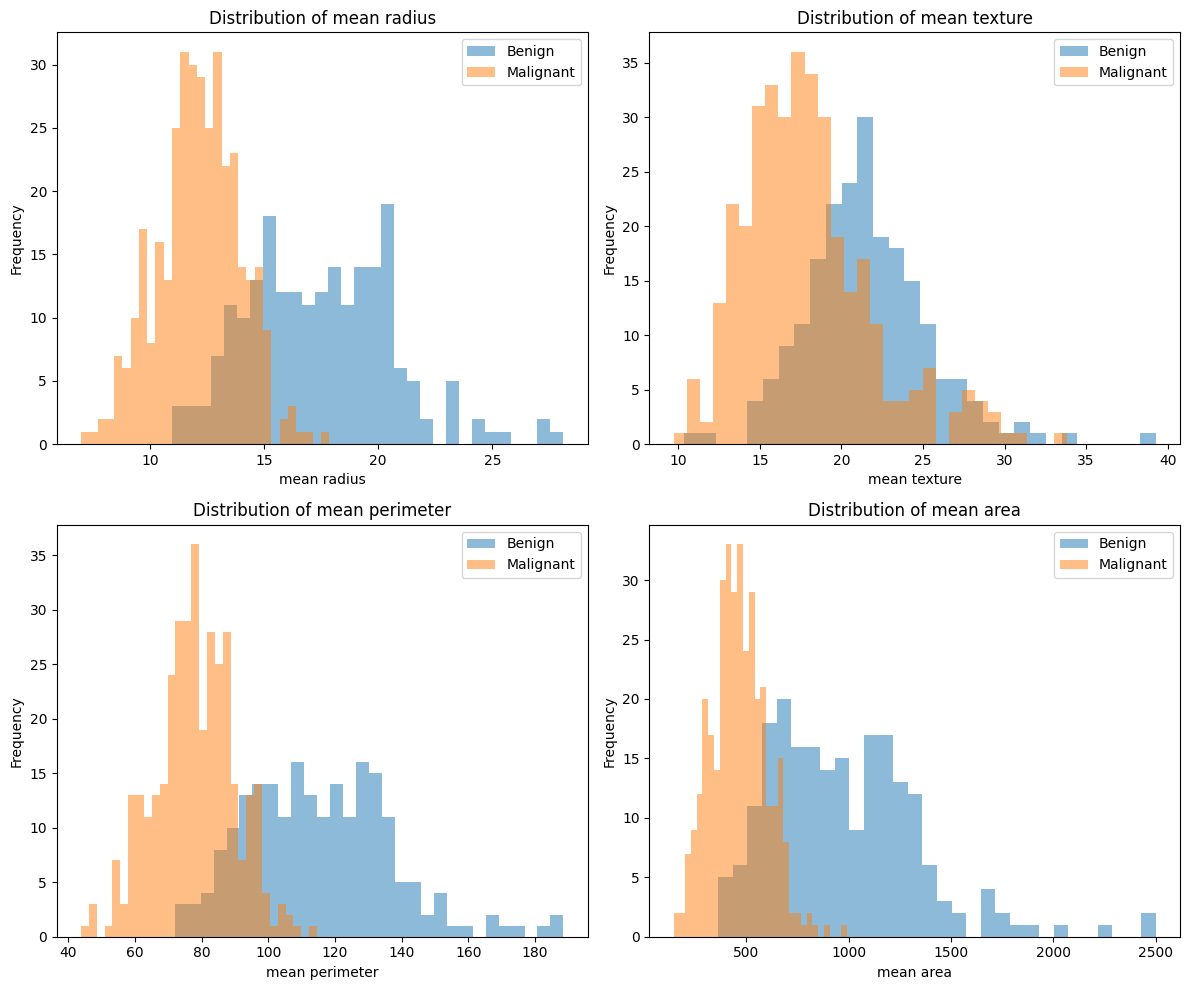

In [2]:
# Basic statistics
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)
display(df.describe())

# Check for missing values
print("\n" + "="*50)
print("MISSING VALUES")
print("="*50)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found!")
else:
    display(missing[missing > 0])

# Visualize feature distributions (select a few key features)
print("\n" + "="*50)
print("FEATURE DISTRIBUTIONS")
print("="*50)

# Select a few representative features to visualize
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    axes[idx].hist(df[df['target'] == 0][feature], alpha=0.5, label='Benign', bins=30)
    axes[idx].hist(df[df['target'] == 1][feature], alpha=0.5, label='Malignant', bins=30)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=150, bbox_inches='tight')
print("Saved visualization to 'feature_distributions.png'")
plt.show()


## Step 3: Split Data into Training and Testing Sets

In this step, we:
- Separate the dataset into features (X) and target (y)
- Split into training (80%) and testing (20%) sets
- Verify that both sets have similar proportions of benign and malignant tumors

Maintaining class distribution ensures the model learns equally from both classes and evaluation is reliable.

In [3]:
# Separate features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # Target column

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and testing sets
# random_state ensures reproducibility
# stratify=y ensures both sets have similar class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n" + "="*50)
print("DATA SPLIT")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training features: {X_train.shape[1]}")
print(f"Test features: {X_test.shape[1]}")

# Verify class distribution in both sets
print("\nTraining set target distribution:")
print(y_train.value_counts())
print(f"  Benign (0): {(y_train == 0).sum()} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  Malignant (1): {(y_train == 1).sum()} ({(y_train == 1).mean()*100:.1f}%)")

print("\nTest set target distribution:")
print(y_test.value_counts())
print(f"  Benign (0): {(y_test == 0).sum()} ({(y_test == 0).mean()*100:.1f}%)")
print(f"  Malignant (1): {(y_test == 1).sum()} ({(y_test == 1).mean()*100:.1f}%)")


Features shape: (569, 30)
Target shape: (569,)

DATA SPLIT
Training set size: 455 samples
Test set size: 114 samples
Training features: 30
Test features: 30

Training set target distribution:
target
1    285
0    170
Name: count, dtype: int64
  Benign (0): 170 (37.4%)
  Malignant (1): 285 (62.6%)

Test set target distribution:
target
1    72
0    42
Name: count, dtype: int64
  Benign (0): 42 (36.8%)
  Malignant (1): 72 (63.2%)


## Step 3 Checkpoint: Verify Train/Test Split

We have successfully split the dataset into training and testing sets with **similar class distributions**:

- **Training set:** 455 samples, 30 features  
  - Benign (0): 170 (37.4%)  
  - Malignant (1): 285 (62.6%)  

- **Test set:** 114 samples, 30 features  
  - Benign (0): 42 (36.8%)  
  - Malignant (1): 72 (63.2%)  

✅ **Checkpoint passed:** The train/test split maintains similar proportions of benign and malignant cases, ensuring a fair evaluation for our model.


## Step 4: Train the K-Nearest Neighbors (KNN) Classifier

In this step, we will:

- Train a KNN classifier on the training data
- Generate predictions for training and test sets
- Allow the user to **experiment with different values of k** (number of neighbors)

**Conceptually:**
KNN predicts the class of a new sample by looking at the majority label of its k nearest neighbors in the feature space.

- Small k → more sensitive to noise (overfitting)  
- Large k → smoother predictions (may underfit)  

Try different k values and observe how it affects predictions and later evaluation metrics.


In [17]:
# Ask user to input the number of neighbors
k = int(input("Enter the number of neighbors (k) for KNN: "))

# Create KNN classifier with user-defined k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"\nKNN classifier trained successfully with k = {knn.n_neighbors}!")

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f"\nNumber of training predictions: {len(y_train_pred)}")
print(f"Number of test predictions: {len(y_test_pred)}")




KNN classifier trained successfully with k = 21!

Number of training predictions: 455
Number of test predictions: 114


## Step 5: Making Predictions

In this step, we:
- Use the trained KNN model to predict the class of each sample in the test set
- Compare predicted labels with actual labels
- Examine a few examples to see where the model predicts correctly and where it makes mistakes

This is an initial check before evaluating overall performance using metrics like accuracy, precision, and recall.

In [18]:
# Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Show the first 10 predictions alongside actual labels
pred_comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

print("First 10 test predictions vs actual values:")
display(pred_comparison.head(10))

# Count of correct and incorrect predictions
correct = (y_test_pred == y_test).sum()
incorrect = (y_test_pred != y_test).sum()
total = len(y_test)

print(f"\nTotal test samples: {total}")
print(f"Correct predictions: {correct} ({correct/total*100:.2f}%)")
print(f"Incorrect predictions: {incorrect} ({incorrect/total*100:.2f}%)")


First 10 test predictions vs actual values:


,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,1,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0



Total test samples: 114
Correct predictions: 107 (93.86%)
Incorrect predictions: 7 (6.14%)


## Step 5.1: Making Predictions on the Entire Test Set

In this step, we:
- Use the trained KNN model to predict the class of **all samples in the test set**
- Compare predicted labels with actual labels
- Count correct vs incorrect predictions

This gives a full view of how the model performs before we compute detailed metrics.

In [19]:
# Make predictions on the entire test set
y_test_pred = knn.predict(X_test)

# Create a DataFrame to compare actual vs predicted for all test samples
pred_comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_test_pred
})

# Show all predictions (optional: limit display if too many)
pd.set_option('display.max_rows', None)  # Show all rows
print("Predictions for all test samples:")
display(pred_comparison)

# Count of correct and incorrect predictions
correct = (y_test_pred == y_test).sum()
incorrect = (y_test_pred != y_test).sum()
total = len(y_test)

print(f"\nTotal test samples: {total}")
print(f"Correct predictions: {correct} ({correct/total*100:.2f}%)")
print(f"Incorrect predictions: {incorrect} ({incorrect/total*100:.2f}%)")


Predictions for all test samples:


,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,1,0
4,0,0
5,1,1
6,1,1
7,0,0
8,0,0
9,0,0



Total test samples: 114
Correct predictions: 107 (93.86%)
Incorrect predictions: 7 (6.14%)


## Effect of Increasing k

We experimented with different values of k (number of neighbors).  

- Initial k = 5 gave good predictions, but some misclassifications were observed.  
- Increasing k to **21 (approximately √N, where N = number of training samples)** improved the number of correct predictions.  

**Why this happens:**  
- Larger k smooths the decision boundary, reducing the impact of noise or outliers in the training set.  
- With k = 21, the model considers more neighbors when voting, leading to more stable and accurate predictions.  

> ✅ Key takeaway: Choosing k is important — starting with a small k is fine, but testing values up to √N can often improve performance.
K = 5 => Correct predictions: 104 (91.23%)
K  =21 => Correct predictions: 107 (93.86%)

## Step 6: Evaluating Model Performance

In this step, we assess how well our KNN model predicts benign vs malignant tumors.

We calculate:

- **Accuracy**: Overall fraction of correct predictions  
- **Precision**: When the model predicts malignant, how often is it correct  
- **Recall**: Of all actual malignant cases, how many did we correctly identify  
- **Confusion Matrix**: Shows counts of true positives, true negatives, false positives, and false negatives  
- **Classification Report**: Detailed metrics for each class, including f1-score  

This step helps us **understand model performance** and identify areas for improvement.

In [20]:
# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nTest Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\n=== Confusion Matrix ===")
print("                Predicted")
print("              Benign  Malignant")
print(f"Actual Benign    {test_confusion[0,0]:4d}      {test_confusion[0,1]:4d}")
print(f"      Malignant  {test_confusion[1,0]:4d}      {test_confusion[1,1]:4d}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred, target_names=cancer_data.target_names))


=== Model Performance ===

Training Accuracy: 0.9341 (93.41%)
Test Accuracy: 0.9386 (93.86%)

Test Precision: 0.9333
Test Recall: 0.9722

=== Confusion Matrix ===
                Predicted
              Benign  Malignant
Actual Benign      37         5
      Malignant     2        70

=== Classification Report ===
              precision    recall  f1-score   support

   malignant       0.95      0.88      0.91        42
      benign       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Step 7: Experimenting with Different K Values

In this step, we explore how the choice of K (number of neighbors) affects KNN performance:

1. We train separate KNN models for each value of K: 1, 3, 5, 7, 9, 11  and **21**
2. For each model, we calculate **Accuracy, Precision, and Recall** on the test set  
3. We compare the results to identify the **best K** that gives the highest accuracy  
4. A plot visualizes how metrics change with K, helping us choose the most stable and effective value  

**Key takeaway:**  
- Small K → more sensitive to noise (can overfit)  
- Large K → smoother decision boundary (may underfit if too large)  
- The optimal K balances accuracy, precision, and recall for the dataset


EXPERIMENTING WITH DIFFERENT K VALUES
K= 1: Accuracy=0.9211, Precision=0.9565, Recall=0.9167
K= 3: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 5: Accuracy=0.9123, Precision=0.9429, Recall=0.9167
K= 7: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 9: Accuracy=0.9386, Precision=0.9452, Recall=0.9583
K=11: Accuracy=0.9386, Precision=0.9452, Recall=0.9583
K=13: Accuracy=0.9474, Precision=0.9459, Recall=0.9722
K=15: Accuracy=0.9298, Precision=0.9324, Recall=0.9583
K=17: Accuracy=0.9386, Precision=0.9333, Recall=0.9722
K=19: Accuracy=0.9386, Precision=0.9333, Recall=0.9722
K=21: Accuracy=0.9386, Precision=0.9333, Recall=0.9722

Best K value: 13 (Accuracy: 0.9474)

Saved visualization to 'knn_k_comparison1-21.png'


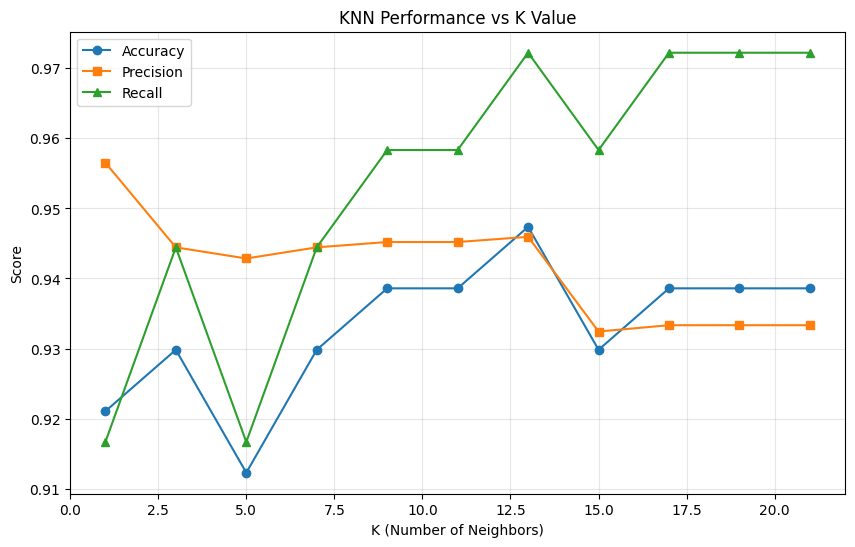

In [26]:
# Experiment with different K values
print("\n" + "="*50)
print("EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*50)

# Include k=21 (~sqrt(N)) along with the original values
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
results = []

for k in k_values:
    # Create and train model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Make predictions
    y_pred_temp = knn_temp.predict(X_test)
    
    # Calculate accuracy, precision, recall
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp)
    rec = recall_score(y_test, y_pred_temp)
    
    # Store results
    results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })
    
    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best K based on highest accuracy
best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
print(f"\nBest K value: {best_k} (Accuracy: {results_df['Accuracy'].max():.4f})")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='s', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='^', label='Recall')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('knn_k_comparison1-21.png', dpi=150, bbox_inches='tight')
print("\nSaved visualization to 'knn_k_comparison1-21.png'")
plt.show()



EXPERIMENTING WITH DIFFERENT K VALUES
K= 1: Accuracy=0.9211, Precision=0.9565, Recall=0.9167
K= 3: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 5: Accuracy=0.9123, Precision=0.9429, Recall=0.9167
K= 7: Accuracy=0.9298, Precision=0.9444, Recall=0.9444
K= 9: Accuracy=0.9386, Precision=0.9452, Recall=0.9583
K=11: Accuracy=0.9386, Precision=0.9452, Recall=0.9583

Best K value: 9 (Accuracy: 0.9386)

Saved visualization to 'knn_k_comparison1-11.png'


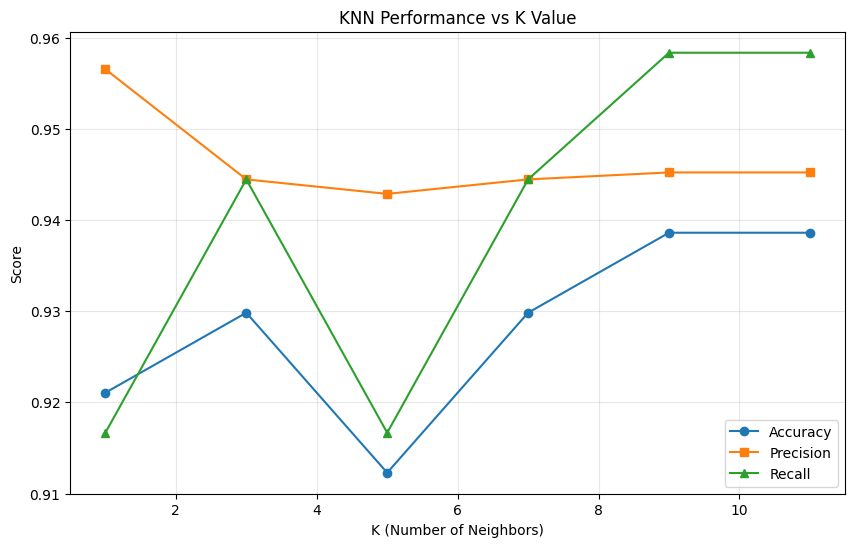

In [27]:
# Experiment with different K values
print("\n" + "="*50)
print("EXPERIMENTING WITH DIFFERENT K VALUES")
print("="*50)

# Include k=21 (~sqrt(N)) along with the original values
k_values = [1, 3, 5, 7, 9, 11]
results = []

for k in k_values:
    # Create and train model
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    # Make predictions
    y_pred_temp = knn_temp.predict(X_test)
    
    # Calculate accuracy, precision, recall
    acc = accuracy_score(y_test, y_pred_temp)
    prec = precision_score(y_test, y_pred_temp)
    rec = recall_score(y_test, y_pred_temp)
    
    # Store results
    results.append({
        'K': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec
    })
    
    print(f"K={k:2d}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best K based on highest accuracy
best_k = results_df.loc[results_df['Accuracy'].idxmax(), 'K']
print(f"\nBest K value: {best_k} (Accuracy: {results_df['Accuracy'].max():.4f})")

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['K'], results_df['Precision'], marker='s', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], marker='^', label='Recall')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('knn_k_comparison1-11.png', dpi=150, bbox_inches='tight')
print("\nSaved visualization to 'knn_k_comparison1-11.png'")
plt.show()


## Comparing KNN Performance Across Different K Values

We tested two ranges of K values: **1–11** and **1–21**.  

### Observations for K = 1–11
- **Accuracy:** Peaks at **K = 9 and K = 11** (93.86%) — both give the same value  
- **Precision:** High for K = 1–11, around 94–95%  
- **Recall:** Improves as K increases, reaching 95.83% at K = 9 and 11  

✅ **Best K in 1–11:** **K = 9 or K = 11**, both provide the same highest accuracy with good precision and recall balance.

### Observations for K = 1–21
- **Accuracy:** Highest at K = 13 (94.74%)  
- **Precision:** Slightly lower than the 1–11 range at larger K, e.g., 93.33–94.59%  
- **Recall:** Continues to improve with larger K, reaching **97.22%** at K = 13, 17, 19, and 21  

✅ **Best K in 1–21:** **K = 13** maximizes accuracy while maintaining high recall, which is important for catching malignant cases.

### Key Takeaways
- Increasing K generally **smooths the decision boundary**, reducing overfitting.  
- Small K → sensitive to noise, may overfit.  
- Large K → more stable predictions, higher recall, but precision can drop slightly.  
- Choosing K depends on your **priority metric**:
  - If maximizing **accuracy** → pick the K with the highest accuracy  
  - If prioritizing **recall** (catching all malignant cases) → a slightly larger K like 13–21 may be preferred  
- For this dataset:  
  - **Best overall K (1–11): 9 or 11**  
  - **Best overall K (1–21): 13
